# Exploratory Data Analysis Project Group 8

### Library Importation

In [1]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Import and Clean

This section's goal is to import different data sheet and clean them to make them meet our expectation of data and be ready for merging.

mbti data sheet

In [2]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

# MBTI data import
df_mbti = pd.read_csv("./data/raw/mbti.csv")

# Drop unrelated comlumns "stat", "enneagram", "img_url"
df_mbti = df_mbti.drop(["stat","enneagram","img_url"],axis = 1)

# Drop duplicated rows
df_mbti = df_mbti.drop_duplicates()

# Check if there is any NaN value or abnormal values in mbti columns 
print(df_mbti["mbti"].unique())
print(df_mbti["mbti"].isna().any())

# Drop the rows are "XXXX" (which is not a mbti type)
df_mbti = df_mbti[df_mbti["mbti"]!= "XXXX"]

# Make sure first letters are capitalized in "role" and "movie" columns
df_mbti["role"] = df_mbti["role"].str.title()
df_mbti["movie"] = df_mbti["movie"].str.title()

# Use str.strip() to remove spaces.
df_mbti["movie"] = df_mbti["movie"].str.strip()

# Regular expression pattern for extracting year: '(.*) \((\d{4})\)'
pattern_year = r'(.*) \((\d{4})\)'

# Extract movies with year
# Save the year into "release_year" columns
df_mbti[['movie_clean', 'release_year']] = df_mbti['movie'].str.extract(pattern_year)

# Regular expression pattern to match content in parentheses
pattern_parentheses = r'\s*\([^)]*\)'

# Remove content in parentheses
# Save movie names without parentheses into "movie_clean" columns
df_mbti['movie_clean'] = df_mbti['movie'].str.replace(pattern_parentheses, '', regex=True)

# Convert "release_year" column to datetime
df_mbti['release_year'] = pd.to_datetime(df_mbti['release_year'], format = '%Y').dt.year

# Drop "movie_name" column
df_mbti.drop("movie",axis=1, inplace=True)

# Rename columns to have consistency in all data sheets
df_mbti.rename(columns={'role': 'character','movie_clean':'movie_name'}, inplace=True)

df_mbti.to_csv("./data/cleaned/df_mbti.csv")

df_mbti.info()

['ESFP' 'XXXX' 'ESFJ' 'ESTP' 'ESTJ' 'ENFP' 'ENFJ' 'ENTP' 'ENTJ' 'ISFP'
 'ISFJ' 'ISTP' 'ISTJ' 'INFP' 'INFJ' 'INTP' 'INTJ']
False
<class 'pandas.core.frame.DataFrame'>
Index: 16727 entries, 0 to 18740
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mbti          16727 non-null  object 
 1   character     16727 non-null  object 
 2   movie_name    16727 non-null  object 
 3   release_year  10939 non-null  float64
dtypes: float64(1), object(3)
memory usage: 653.4+ KB


In [3]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

df_mbti.sample(10)

,mbti,character,movie_name,release_year
1918,ESFJ,Corporal,Madagascar,NaN
3855,ESTP,Volpina,Amarcord,1973.0
204,ESFP,Marcus Burnett,Bad Boys,NaN
9520,ENTJ,Deus Ex Machina,The Matrix Trilogy,NaN
10450,ISFP,Maxence,The Chorus,2004.0
14461,ISTJ,Louis Dega,Papillon,1973.0
7430,ENFJ,Mayday,Planes,2013.0
2312,ESFJ,Beth,Circle,2015.0
10226,ISFP,Satipo,Indiana Jones,NaN
5338,ESTJ,The Bishop,Salò O Le 120 Giornate Di Sodoma,1975.0


imdb_movies

In [4]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

# imdb_movies data import
df_imdb_map = pd.read_csv("./data/raw/imdb_movies.csv")

# Drop unrelated comlumns "stat", "enneagram", "img_url"
df_imdb_map = df_imdb_map.drop(["overview","crew","orig_title","status","orig_lang"],axis = 1)

# Drop duplicated rows
df_imdb_map = df_imdb_map.drop_duplicates()

# Check if there is any NaN value in "names" columns 
print(df_imdb_map["names"].isna().any())

# Make sure first letters are capitalized in "names" and "genre" columns
df_imdb_map["names"] = df_imdb_map["names"].str.title()
df_imdb_map["genre"] = df_imdb_map["genre"].str.title()

# Strip whitespace
df_imdb_map['date_x'] = df_imdb_map['date_x'].str.strip()

# Convert "date_x" column to datetime
df_imdb_map['date_x'] = pd.to_datetime(df_imdb_map['date_x'], format='%m/%d/%Y')

# Create "release_year" column
df_imdb_map['release_year'] = df_imdb_map['date_x'].dt.year.astype('float')

# Rename columns to have consistency in all data sheets
df_imdb_map.rename(columns={'names': 'movie_name', 'date_x': 'release_date','budget_x':'budget'}, inplace=True)

df_imdb_map.to_csv("./data/cleaned/df_imdb_map.csv")

df_imdb_map.info()

False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_name    10178 non-null  object        
 1   release_date  10178 non-null  datetime64[ns]
 2   score         10178 non-null  float64       
 3   genre         10093 non-null  object        
 4   budget        10178 non-null  float64       
 5   revenue       10178 non-null  float64       
 6   country       10178 non-null  object        
 7   release_year  10178 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 636.2+ KB


In [5]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

df_imdb_map.sample(10)

,movie_name,release_date,score,genre,budget,revenue,country,release_year
6306,Married Women: Husband Change,2020-01-23,47.0,Romance,135200000.0,947468745.8,KR,2020.0
4353,Rurouni Kenshin Part Iii: The Legend Ends,2014-09-13,77.0,"Action, Adventure, Drama, Fantasy",124200000.0,640997166.4,JP,2014.0
6244,Good People,2015-01-08,55.0,"Thriller, Crime, Action",6440000.0,1857574.0,DK,2015.0
2853,The Raffle,1991-11-15,70.0,Drama,71200000.0,530413654.6,IT,1991.0
8376,A Mermaid In Paris,2022-10-13,66.0,"Romance, Fantasy, Drama, Comedy",123600000.0,565198234.0,AU,2022.0
9590,Nameless Gangster,2012-02-02,69.0,"Crime, Thriller",125000.0,257720413.2,KR,2012.0
5512,Tarzan Ii,2005-06-13,61.0,"Adventure, Animation, Family",120000000.0,274833060.0,US,2005.0
728,1917,2020-01-09,80.0,"War, Drama, History",100000000.0,389140440.0,AU,2020.0
797,The Chalk Line,2022-09-09,64.0,Horror,92600000.0,353391998.4,ES,2022.0
9117,Sphere,1998-04-02,61.0,"Science Fiction, Mystery, Thriller",73000000.0,50168294.0,AU,1998.0


imdb_db

In [6]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

#imdb_db data import
df_db = pd.read_csv("./data/raw/imdb_db.csv")

# Drop unrelated comlumns "Number of Votes","Time Duration (min)","Director","Actors","Restriction","Description","Serie Name","Serie Date"
df_db = df_db.drop(["Number of Votes","Time Duration (min)","Director","Actors","Restriction","Description","Serie Name","Serie Date"],axis = 1)

# Drop duplicated rows
df_db = df_db.drop_duplicates()

# Check if there is any NaN value in "Movie Name" columns 
print(df_db["Movie Name"].isna().any())

# Make sure first letters are capitalized in "Movie Name" and "Movie Type" columns
df_db["Movie Name"] = df_db["Movie Name"].str.title()
df_db["Movie Type"] = df_db["Movie Type"].str.title()

# Remove square brackets in "Movie Type" column
df_db['Movie Type'] = df_db['Movie Type'].str.replace(r'[\[\]]', '', regex=True)

# Remove single quotes in "Movie Type" column
df_db['Movie Type'] = df_db['Movie Type'].str.replace(r"'", '', regex=True)

# Rename columns to have consistency in all data sheets
df_db.rename(columns={'Movie Name': 'movie_name',
                            'Movie Date': 'release_year',
                            'Movie Type':'genre',
                            'Movie Revenue (M$)':'revenue',
                            'Score':'score',
                            'Metascore':'metascore'}, inplace=True)

df_db.to_csv("./data/cleaned/df_db.csv")
df_db.info()

False
<class 'pandas.core.frame.DataFrame'>
Index: 130482 entries, 0 to 189895
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   movie_name    130482 non-null  object 
 1   release_year  130477 non-null  float64
 2   genre         130482 non-null  object 
 3   revenue       9082 non-null    float64
 4   score         130482 non-null  float64
 5   metascore     8672 non-null    float64
dtypes: float64(4), object(2)
memory usage: 7.0+ MB


In [7]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

df_db.sample(10)

,movie_name,release_year,genre,revenue,score,metascore
101202,Savasci (Warrior),2017.0,"Action, Drama, War",NaN,6.1,NaN
168693,Director'S Trademarks,2017.0,Reality-Tv,NaN,9.1,NaN
57262,Psv Garuda Vega,2017.0,"Action, Drama",NaN,7.9,NaN
22673,Little Accidents,2014.0,Drama,NaN,5.8,56.0
66777,Fellini: Je Suis Un Grand Menteur,2002.0,"Documentary, Biography",106080.0,7.1,67.0
140961,Assassin'S Creed: Chronicles,2015.0,"Action, Adventure",NaN,6.3,NaN
119443,Where Your Eyes Linger,2020.0,"Comedy, Romance",NaN,8.2,NaN
10596,Soul Men,2008.0,"Comedy, Drama, Music",12081447.0,6.4,49.0
21468,The Five Heartbeats,1991.0,"Drama, Music",8750400.0,7.6,NaN
12630,Chandni Chowk To China,2009.0,"Action, Comedy",921738.0,4.0,44.0


In [8]:
#combined_dataset = pd.merge(df_imdb_map, df_db, on=['movie_name','release_year'], how='outer')
#combined_dataset.info()

### Merge df_db and df_mbti

In [9]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

# Split df_mbti into two datasets: one where release_year is not null and one where it is null
df_mbti_with_year = df_mbti[df_mbti['release_year'].notnull()]
df_mbti_no_year = df_mbti[df_mbti['release_year'].isnull()]

# Drop release_year for merge
df_mbti_no_year.drop('release_year', inplace=True, axis=1)

# Merge the datasets based only on 'movie_name' for those without a release year
merged_no_year = pd.merge(df_mbti_no_year, df_db, on='movie_name', how='inner')

# Drop abnormal rows (there are multiple matches from the imdb_db dataset which we don't know they are correct or not)
merged_no_year.drop_duplicates(subset=['movie_name','character'],keep = 'first',inplace=True)

# Merge the datasets based on 'movie_name_clean' and 'release_year' for those with a release year
merged_with_year = pd.merge(df_mbti_with_year, df_db, on=['movie_name', 'release_year'], how='inner')

# Drop abnormal rows (there are multiple matches from the imdb_db dataset which we don't know they are correct or not)
merged_with_year.drop_duplicates(subset=['movie_name','character','release_year'],keep = 'first',inplace=True)

# Combine the two merged datasets
final_merged_df = pd.concat([merged_with_year, merged_no_year])

# Display the first few rows of the final merged dataset
final_merged_df.sort_values(['movie_name','mbti']).to_csv("./data/cleaned/df_merged.csv")

/var/folders/br/n0gxlymn0t53y30rm6v_3swc0000gn/T/ipykernel_10551/1569939163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mbti_no_year.drop('release_year', inplace=True, axis=1)


In [10]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2811 entries, 0 to 2646
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mbti          2811 non-null   object 
 1   character     2811 non-null   object 
 2   movie_name    2811 non-null   object 
 3   release_year  2811 non-null   float64
 4   genre         2811 non-null   object 
 5   revenue       384 non-null    float64
 6   score         2811 non-null   float64
 7   metascore     483 non-null    float64
dtypes: float64(4), object(4)
memory usage: 197.6+ KB


In [11]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

final_merged_df.sample(10)

,mbti,character,movie_name,release_year,genre,revenue,score,metascore
244,ENFJ,Destiny,Finding Nemo,2003.0,"Action, Adventure, Drama",NaN,7.1,NaN
1097,INTP,Sam Coleman,Godzilla,1956.0,"Action, Horror, Sci-Fi",NaN,6.5,60.0
1720,ENTJ,Avis Amberg,Hollywood,1980.0,"Documentary, History",NaN,9.3,NaN
628,ISFJ,Bruni,Frozen,2005.0,Thriller,NaN,5.5,NaN
257,ISTJ,Celeste,K-12,2019.0,"Fantasy, Horror, Musical",303230.0,6.4,NaN
74,ISFP,Rose Tico,Star Wars,1983.0,"Action, Adventure, Sci-Fi",NaN,8.1,NaN
774,INFJ,Marius,Psychobitch,2019.0,Drama,NaN,6.9,NaN
408,ISTJ,"Dennis (Kevin ""Wendell"" Crumb)",Split,2016.0,"Comedy, Romance, Sport",NaN,2.9,NaN
1170,ENTJ,Lovelace,Happy Feet,2006.0,"Action, Adventure, Family",NaN,6.3,NaN
118,ISTJ,Darth Vader,Star Wars,1983.0,"Action, Adventure, Sci-Fi",NaN,8.1,NaN


In [12]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong.

final_merged_df.head()

,mbti,character,movie_name,release_year,genre,revenue,score,metascore
0,ESFP,Jack Dawson,Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0
1,ESTP,Brock Lovett,Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0
2,ESTP,Fifth Officer Harold Lowe,Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0
3,ESTJ,"Caledon ""Cal"" Hockley",Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0
4,ESTJ,Bruce Ismay,Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0


In [13]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong.

# Converting the final dataset into csv file
final_merged_df.to_csv("final_merged_dataset.csv", index = False)


# Data Analysis - Genre and MBTI - Xiaotong 'Brandon' Ma

In [14]:
df_mbti_genre = final_merged_df.copy()

# Since a movie can belong to multiple genres, we need to split the genre field and then explode it
df_mbti_genre['genre'] = df_mbti_genre['genre'].str.split(', ')

# Exploding the dataframe on the 'genre' column
df_mbti_genre = df_mbti_genre.explode('genre')

# Counting the number of each MBTI type across all movies, grouped by genre
mbti_count_by_genre = df_mbti_genre.groupby(['genre', 'mbti']).size().reset_index(name='count')

# Group by 'genre' and filter based on the sum of 'count'
mbti_count_by_genre = mbti_count_by_genre.groupby('genre').filter(lambda x: x['count'].sum() >= 100)

# Calculate the distribution based on normalization on genre
mbti_count_by_genre["total_count_each_genre"] = mbti_count_by_genre.groupby("genre")["count"].transform('sum')
mbti_count_by_genre["mbti_by_genre_proportion"] = mbti_count_by_genre["count"] / mbti_count_by_genre["total_count_each_genre"] * 100

# Calculate the distribution based on normalization both on genre and mbti
mbti_count_by_genre["total_count_each_mbti"] = mbti_count_by_genre.groupby("mbti")["mbti_by_genre_proportion"].transform('sum')
mbti_count_by_genre["genre_by_mbti_proportion"] = mbti_count_by_genre["mbti_by_genre_proportion"] / mbti_count_by_genre["total_count_each_mbti"] * 100

In [15]:
# Take a look
mbti_count_by_genre.sample(10)

,genre,mbti,count,total_count_each_genre,mbti_by_genre_proportion,total_count_each_mbti,genre_by_mbti_proportion
1,Action,ENFP,34,1124,3.024911,78.117112,3.872277
80,Crime,ENFJ,12,227,5.286344,60.240179,8.775445
240,Mystery,INTP,3,187,1.604278,52.688852,3.044815
196,Horror,ISTJ,17,285,5.964912,104.064145,5.731957
132,Family,ESFP,35,382,9.162304,106.784391,8.580190
148,Fantasy,ESFP,23,315,7.301587,106.784391,6.837692
254,Romance,ESFJ,18,241,7.468880,63.093498,11.837796
278,Sci-Fi,ISFJ,35,360,9.722222,107.487900,9.044946
182,Horror,ENFJ,9,285,3.157895,60.240179,5.242174
91,Crime,INTP,6,227,2.643172,52.688852,5.016567


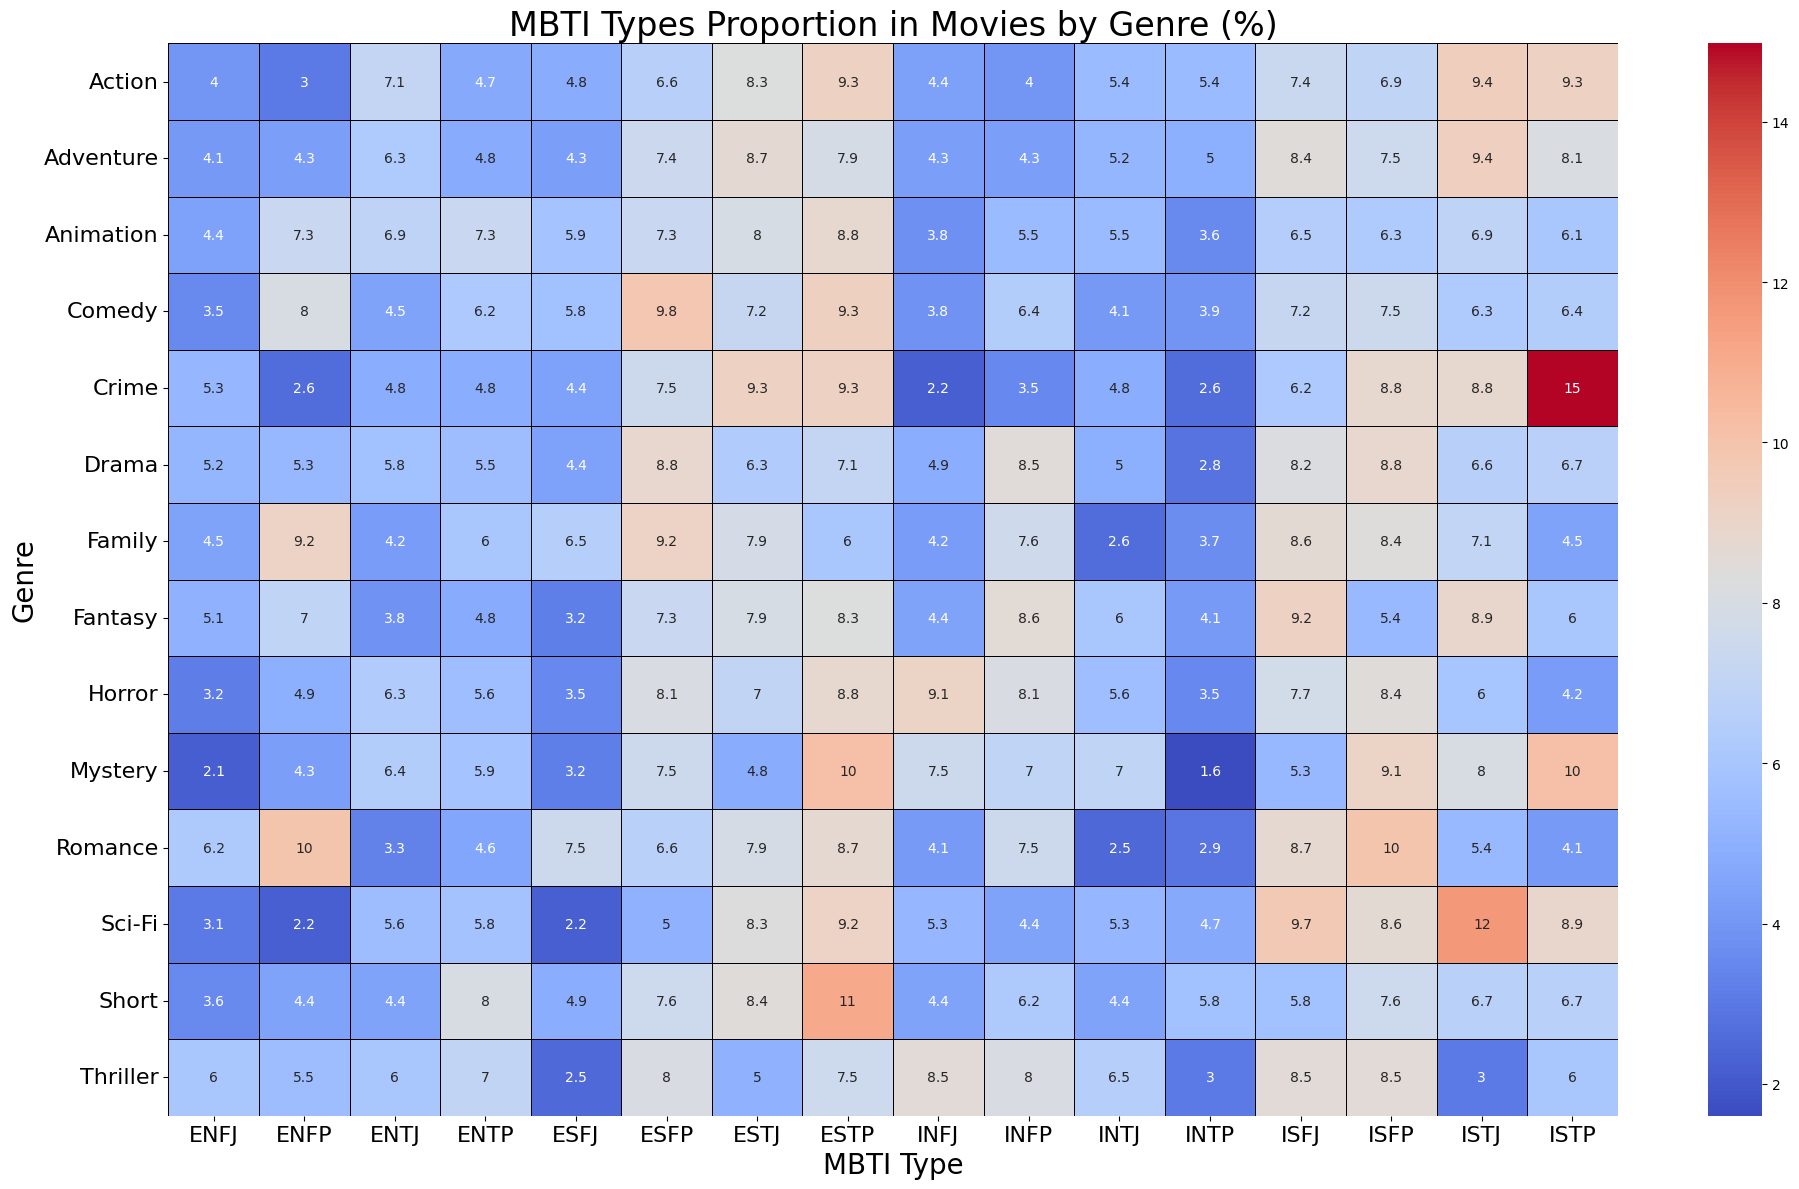

In [16]:
# Creating a pivot table for better plotting
pivot_table = mbti_count_by_genre.pivot_table(index='genre', columns='mbti', values='mbti_by_genre_proportion', fill_value=0)

# Convert counts to integers for better formatting in the heatmap
pivot_table = pivot_table.astype(float)

# Your existing code for creating the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=.5, linecolor='black')
plt.title('MBTI Types Proportion in Movies by Genre (%)', fontsize=24)
plt.ylabel('Genre', fontsize=20)
plt.xlabel('MBTI Type', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.tight_layout()

# Save the figure with high resolution
plt.savefig("./images/mbti_genre.png", dpi=300)  # Increase the dpi for better quality

# Show the plot
plt.show()

In [17]:
# Label four demensions
mbti_count_by_genre["I-E"] = mbti_count_by_genre["mbti"].isin(["ISTJ", "INTJ", "ISTP", "INTP", "ISFJ", "INFJ", "ISFP", "INFP"])
mbti_count_by_genre["I-E"] = mbti_count_by_genre["I-E"].replace({True: 'Introverts', False: 'Extroverts'})

mbti_count_by_genre["S-N"] = mbti_count_by_genre["mbti"].isin(["ISTJ", "ISTP", "ISFJ", "ISFP", "ESTJ", "ESTP", "ESFJ", "ESFP"])
mbti_count_by_genre["S-N"] = mbti_count_by_genre["S-N"].replace({True: 'Sensing', False: 'Intuition'})

mbti_count_by_genre["T-F"] = mbti_count_by_genre["mbti"].isin(["ISTJ", "ISTP", "INTJ", "INTP", "ESTJ", "ESTP", "ENTJ", "ENTP"])
mbti_count_by_genre["T-F"] = mbti_count_by_genre["T-F"].replace({True: 'Thinking', False: 'Feeling'})

mbti_count_by_genre["J-P"] = mbti_count_by_genre["mbti"].isin(["ISTJ", "ISFJ", "INTJ", "INFJ", "ESTJ", "ESFJ", "ENTJ", "ENFJ"])
mbti_count_by_genre["J-P"] = mbti_count_by_genre["J-P"].replace({True: 'Judging', False: 'Perceving'})

In [18]:
# Function to plot MBTI demensions and genre
def plot_mbti_proportions_genre(data, category, file_name, colors=("lightblue", "lightcoral")):
    """
    Function to plot MBTI proportions by genre, grouped by a specified MBTI category, with customizable colors.

    Parameters:
    data (DataFrame): The dataset containing MBTI information.
    category (str): The MBTI category to group by. Options: 'I-E', 'S-N', 'T-F', 'J-P'.
    filename (str): The filename assigned for local file
    colors (tuple): A tuple of two color values for the plot.
    """
    # Grouping the data by 'genre' and the specified category, summing 'mbti_by_genre_proportion'
    grouped_data = data.groupby(['genre', category])['mbti_by_genre_proportion'].sum().reset_index()

    # Plotting with the specified colors
    plt.figure(figsize=(20, 10))
    sns.barplot(x='genre', y='mbti_by_genre_proportion', hue=category, data=grouped_data, palette=colors)
    plt.title(f'Sum of MBTI Proportion in Each Genre Grouped by {category}', fontsize=24)
    plt.xticks(fontsize = 16)
    plt.yticks(rotation=0, fontsize=16) 
    plt.ylabel('MBTI Proportion (%)', fontsize=20)
    plt.xlabel('Genre', fontsize=20)
    plt.legend(title=category, fontsize = 14)
    plt.tight_layout()

    # Saving the plot to a file
    file_path = f"./images/{file_name}.png"
    plt.savefig(file_path)

    # Displaying the plot
    plt.show()

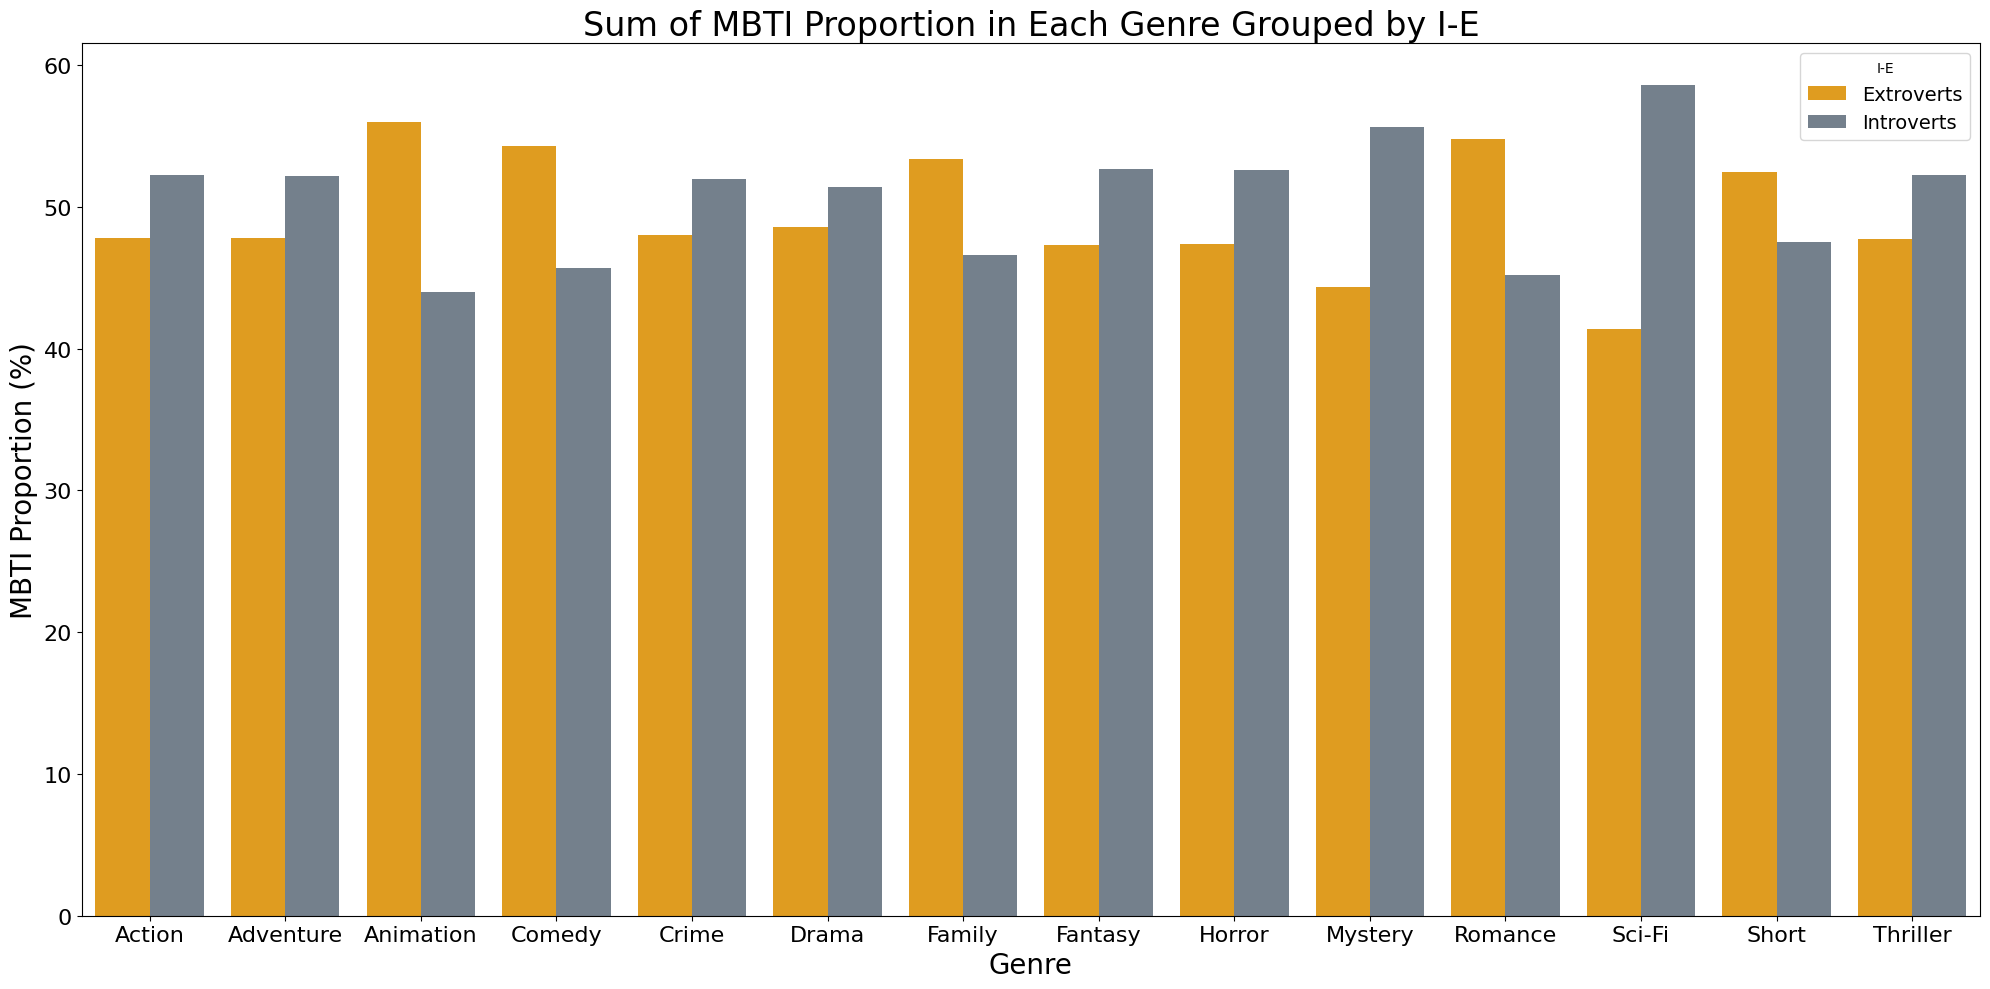

In [19]:
# I-E
plot_mbti_proportions_genre(mbti_count_by_genre, 'I-E',"Sum of MBTI Proportion in Each Genre Grouped by I-E", colors=("#FFA500", "#708090"))  # Custom colors for Introverts and Extroverts

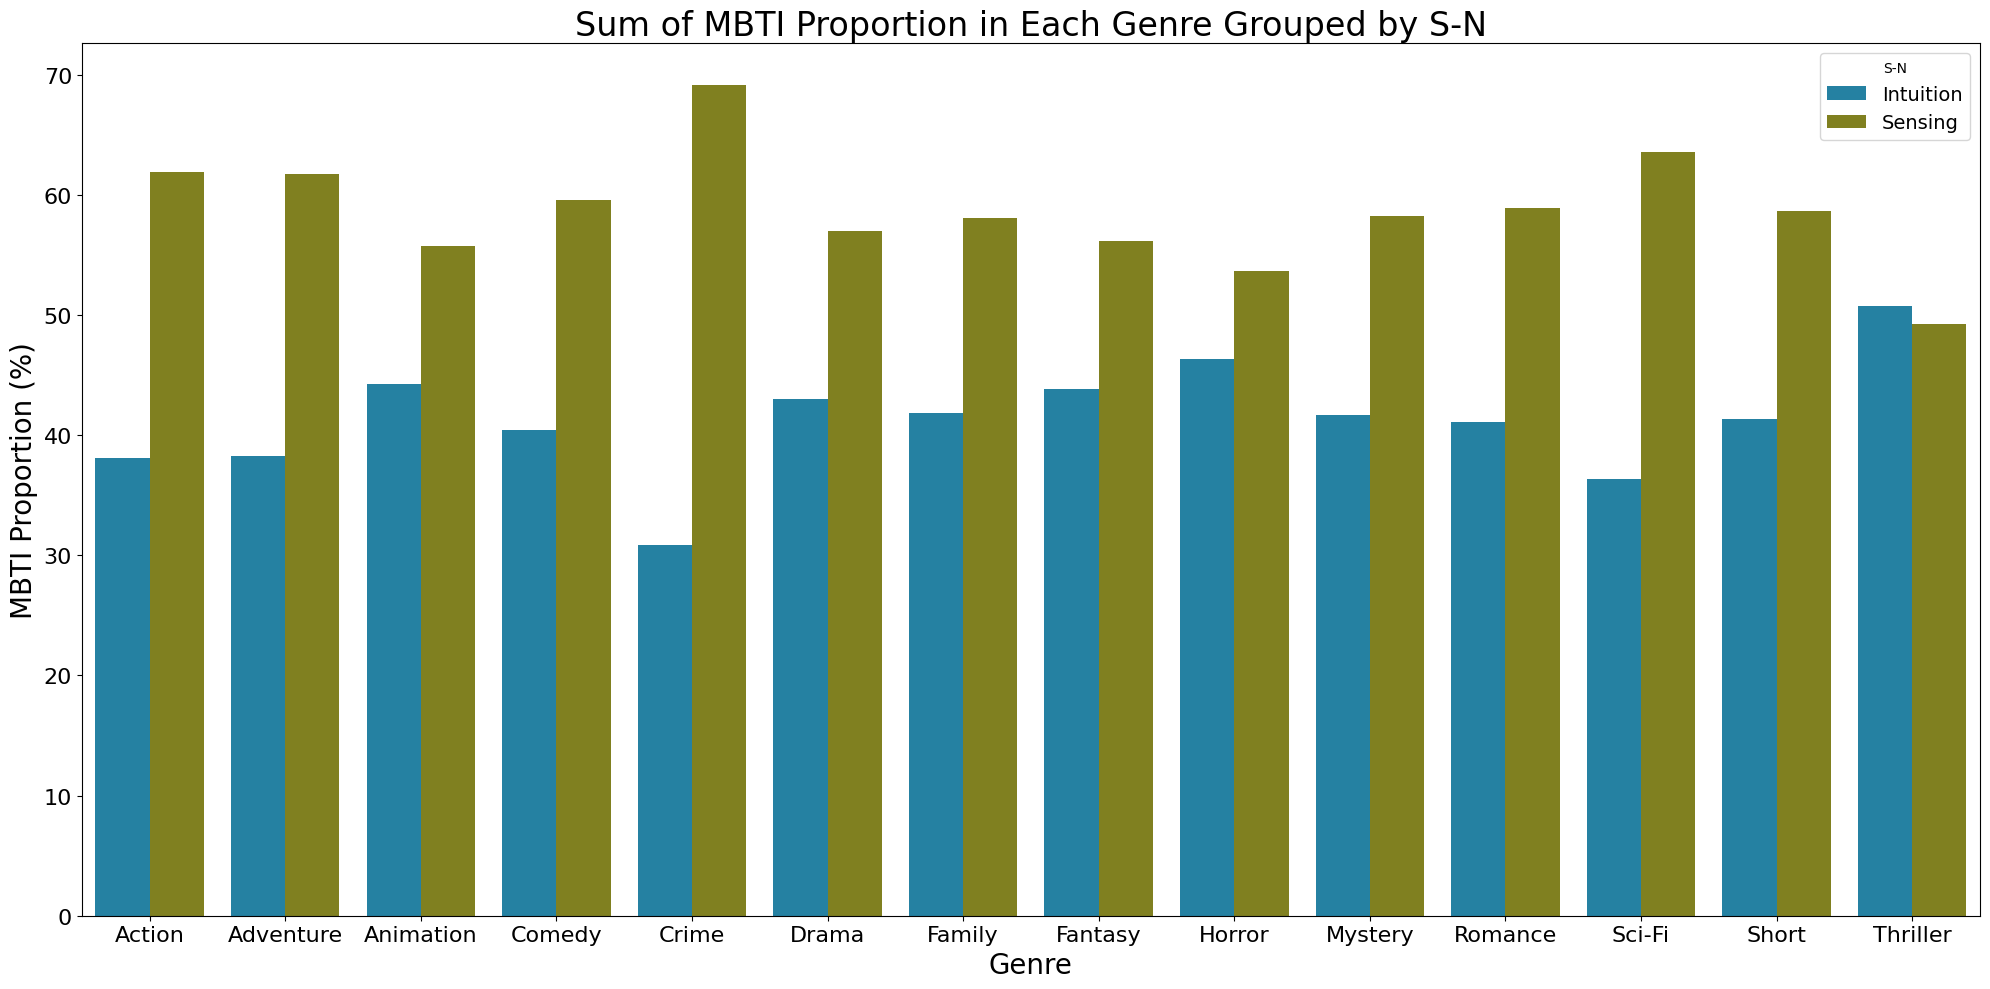

In [20]:
# S-N
plot_mbti_proportions_genre(mbti_count_by_genre, 'S-N',"Sum of MBTI Proportion in Each Genre Grouped by S-N", colors=("#108BB7", "#909010"))

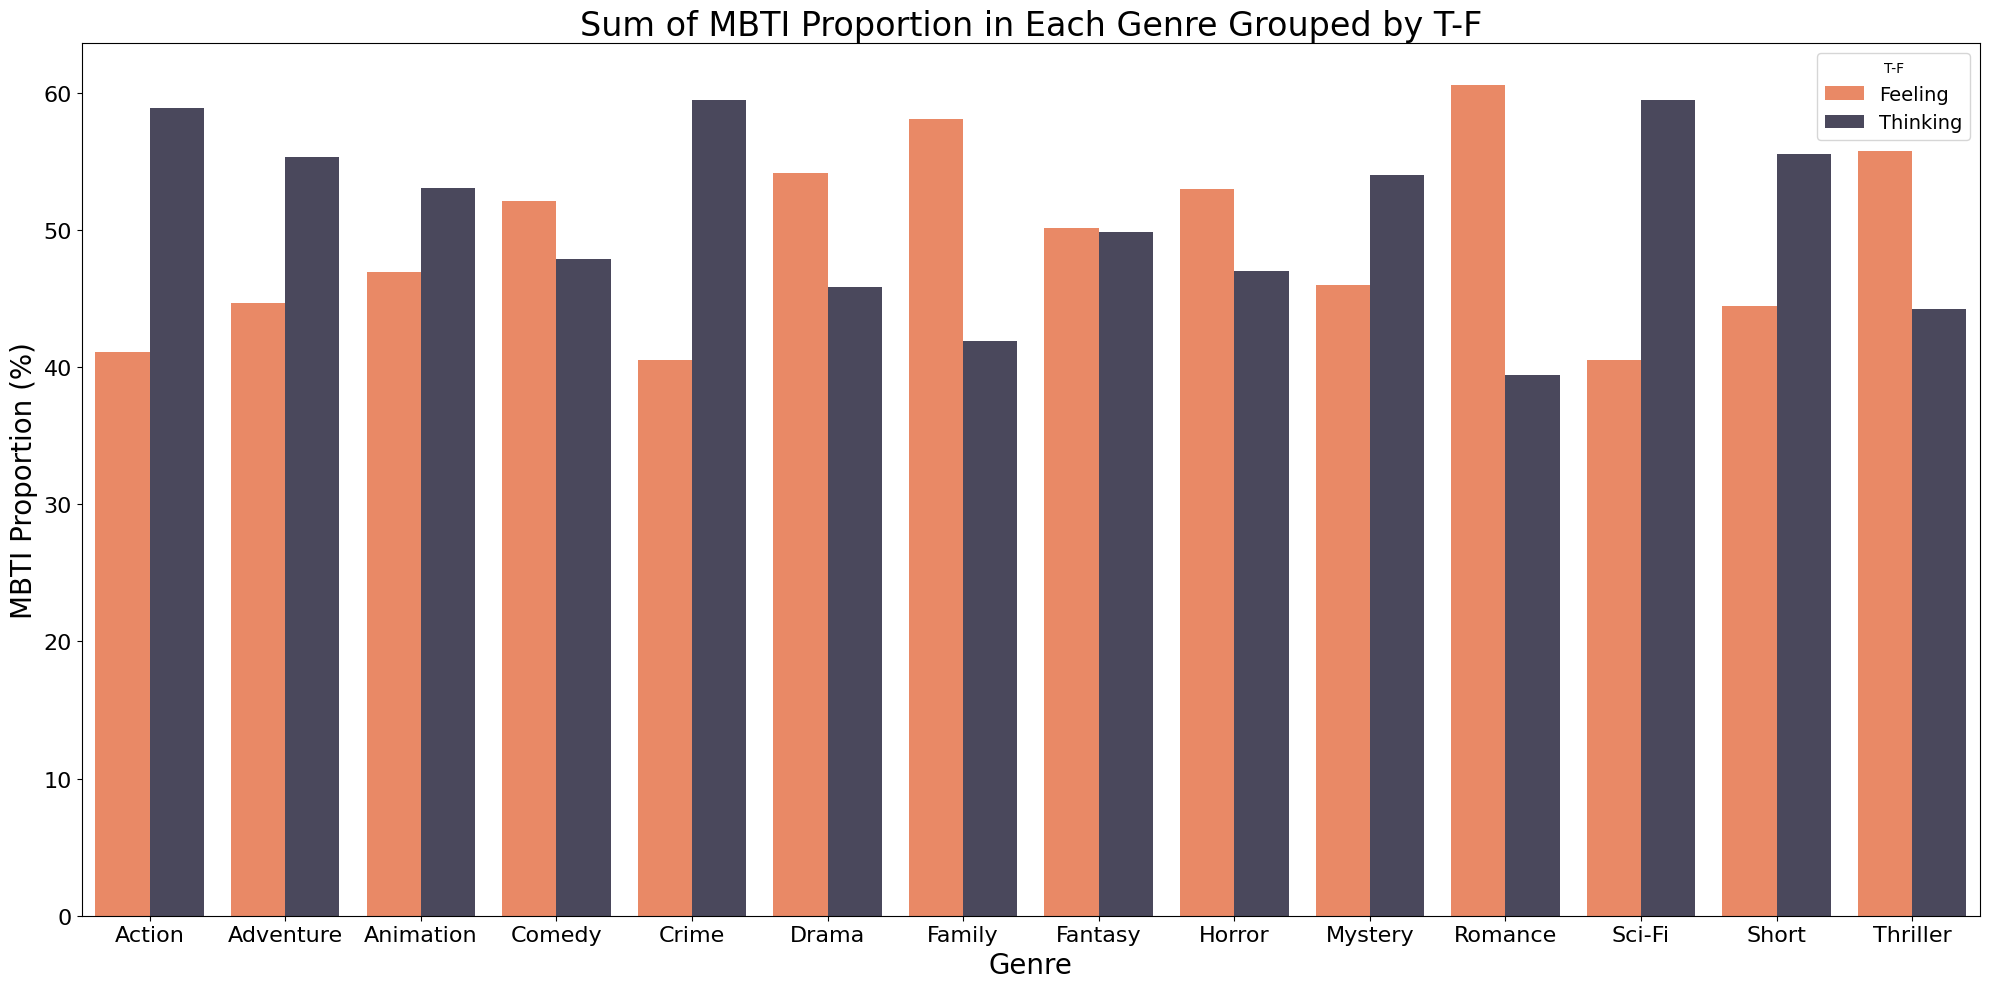

In [21]:
# T-F
plot_mbti_proportions_genre(mbti_count_by_genre, 'T-F',"Sum of MBTI Proportion in Each Genre Grouped by T-F", colors=("#FF7F50", "#47455F"))

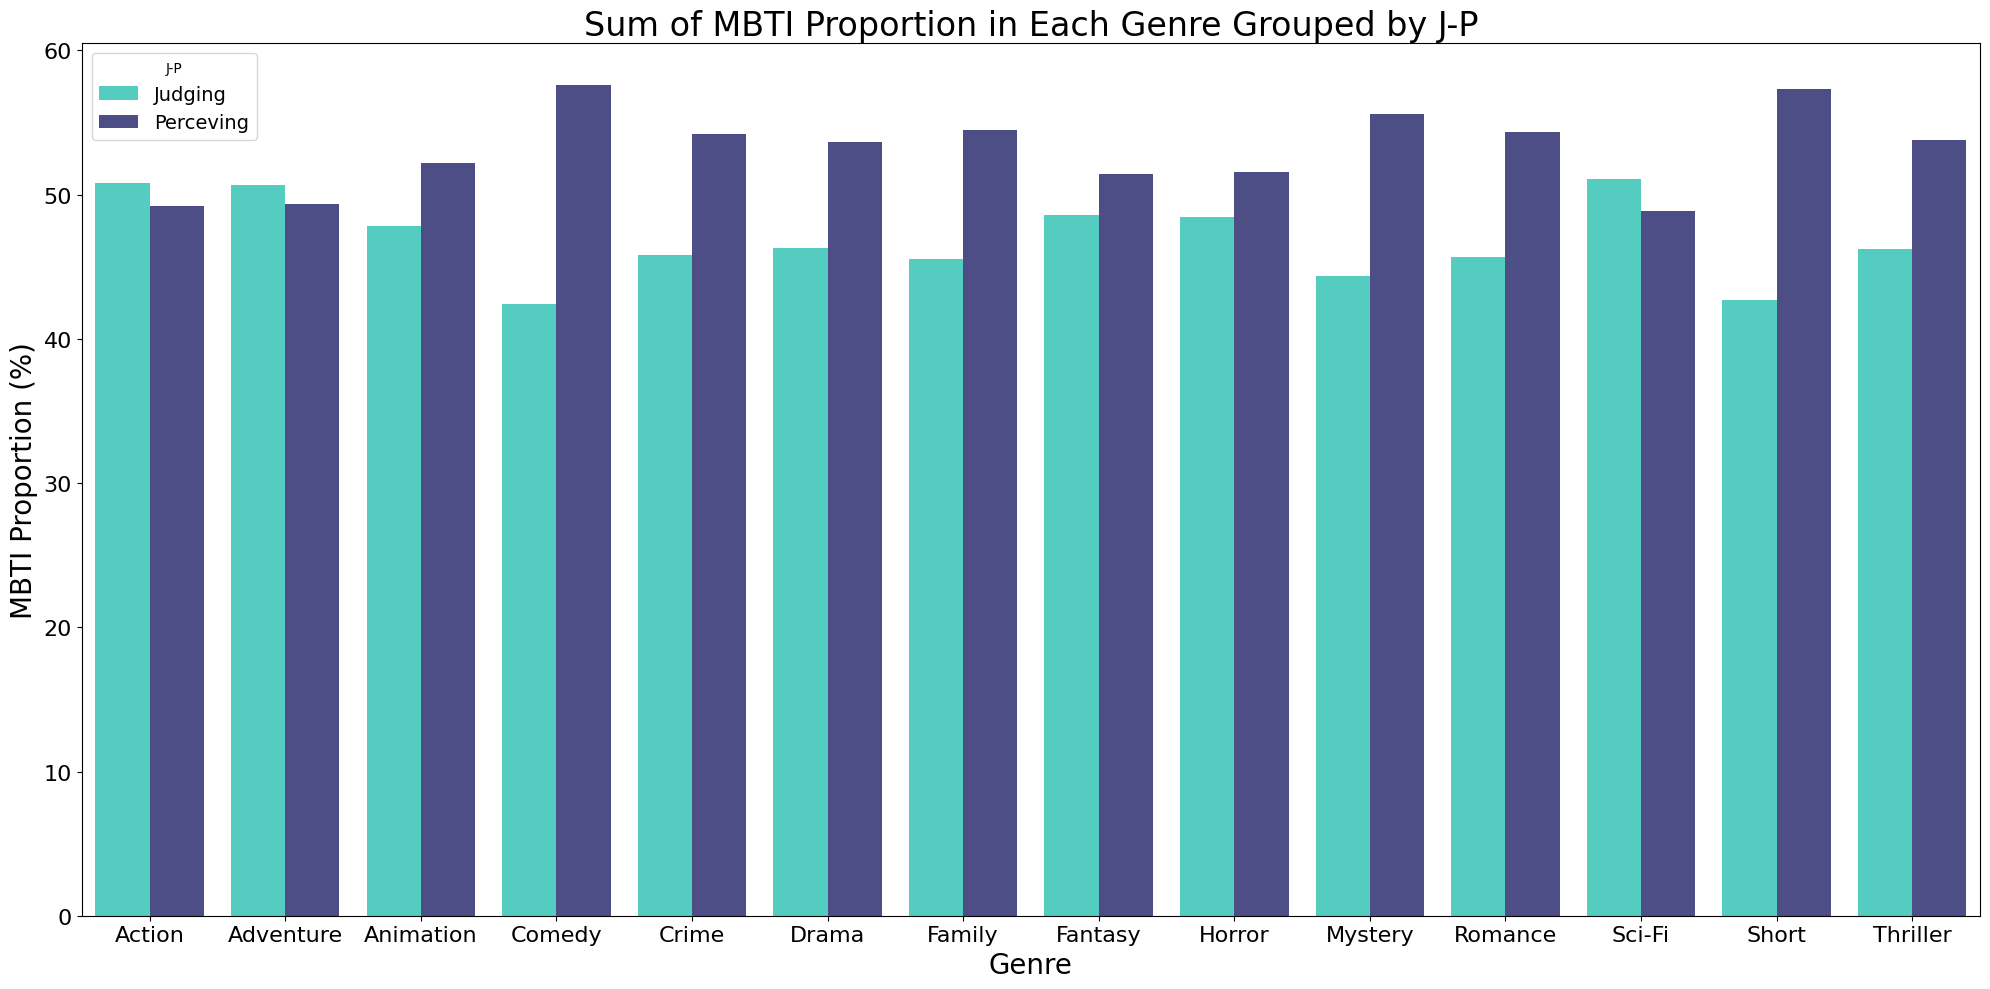

In [22]:
# J-P
plot_mbti_proportions_genre(mbti_count_by_genre, 'J-P',"Sum of MBTI Proportion in Each Genre Grouped by J-P", colors=("#40E0D0", "#444490"))

<Figure size 1800x1000 with 0 Axes>

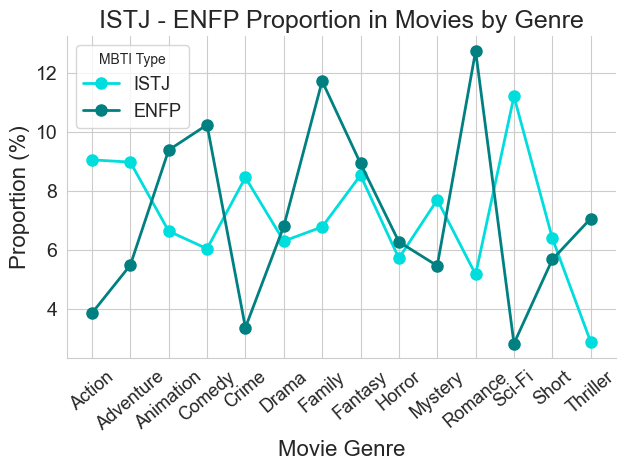

In [23]:
# Filtering for ISTJ and ENFP
filtered_df = mbti_count_by_genre[mbti_count_by_genre['mbti'].isin(['ISTJ', 'ENFP'])]

# Pivoting the DataFrame and reordering columns for correct legend
pivot_df = filtered_df.pivot(index='genre', columns='mbti', values='genre_by_mbti_proportion')
pivot_df = pivot_df[['ISTJ', 'ENFP']]  # Ensuring ISTJ is first and ENFP is second

# Adjusting the plot to make it wider
plt.figure(figsize=(18, 10))  # Increased width
sns.set_style("whitegrid")

# Line plot with wider plot size
ax = pivot_df.plot(kind='line', marker='o', color=['#00DDDD', '#008080'], linewidth=2, markersize=8)

# Customizing the plot with wider size
plt.xlabel('Movie Genre', fontsize=16)
plt.ylabel('Proportion (%)', fontsize=16)
plt.title('ISTJ - ENFP Proportion in Movies by Genre', fontsize=18)
plt.xticks(rotation=40, ticks=range(len(pivot_df.index)), labels=pivot_df.index, fontsize=13)
plt.yticks(fontsize=14)
ax.legend(['ISTJ', 'ENFP'], title='MBTI Type', fontsize=13)
sns.despine()

# Showing the plot with the corrected legend
plt.tight_layout()

# Save the figure with high resolution
plt.savefig("./images/ISTJ-ENFP_genre.png", dpi=300)  # Increase the dpi for better quality

plt.show()